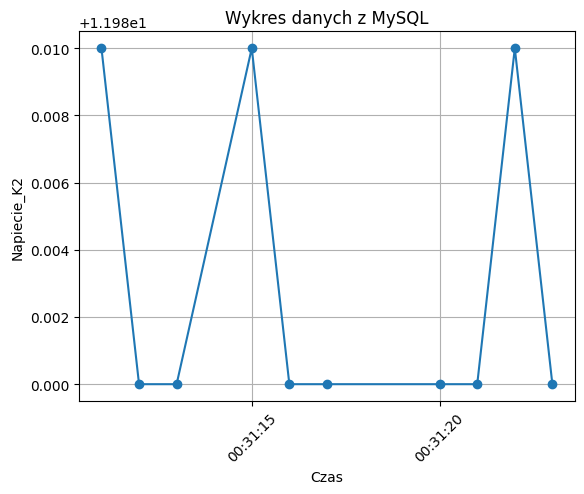

Połączenie z bazą danych zostało zamknięte.


In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

try:
    # Połączenie z bazą MySQL
    conn = mysql.connector.connect(
        host="localhost",
        user="root",
        password="123",
        database="Projekt_db"
    )
    
    cursor = conn.cursor()

    try:
        # Pobieranie danych
        cursor.execute("SELECT Czas, Napiecie_K2 FROM Pomiary ORDER BY Czas DESC LIMIT 10")
        rows = cursor.fetchall()

        if not rows:
            raise ValueError("Zapytanie nie zwróciło żadnych wyników.")

        # Tworzenie DataFrame
        df = pd.DataFrame(rows, columns=['Czas', 'Napiecie_K2'])

        try:
            df['Data'] = pd.to_datetime(df['Czas'])
        except Exception as e:
            raise ValueError(f"Błąd konwersji kolumny 'Czas' na format datetime: {e}")

        # Rysowanie wykresu
        
        plt.plot(df['Czas'], df['Napiecie_K2'], marker='o', linestyle='-')
        plt.xlabel("Czas")
        plt.ylabel("Napiecie_K2")
        plt.title("Wykres danych z MySQL")
        plt.xticks(rotation=45)
        plt.grid()
        plt.show()

    except mysql.connector.Error as err:
        print(f"Błąd podczas wykonywania zapytania SQL: {err}")
    except ValueError as ve:
        print(f"Błąd danych: {ve}")
    finally:
        cursor.close()

except mysql.connector.Error as err:
    print(f"Błąd połączenia z bazą danych: {err}")

finally:
    try:
        if conn.is_connected():
            conn.close()
            print("Połączenie z bazą danych zostało zamknięte.")
    except NameError:
        print("Nie udało się nawiązać połączenia z bazą danych.")


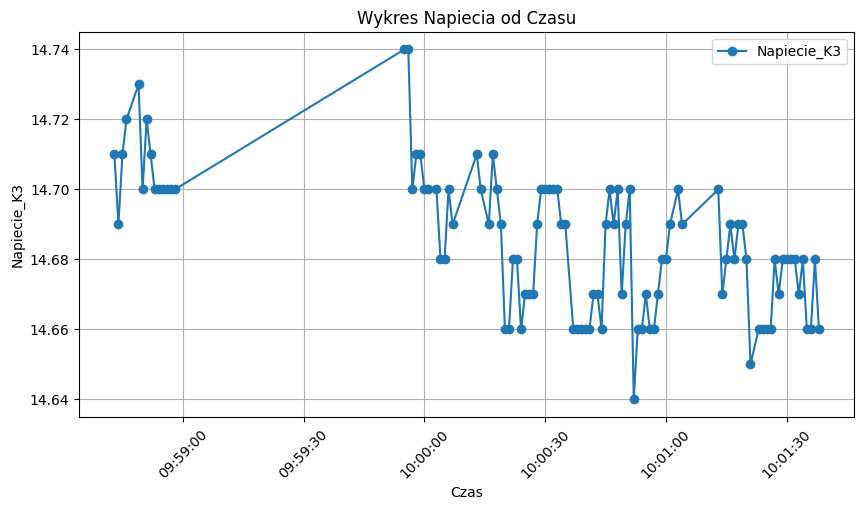

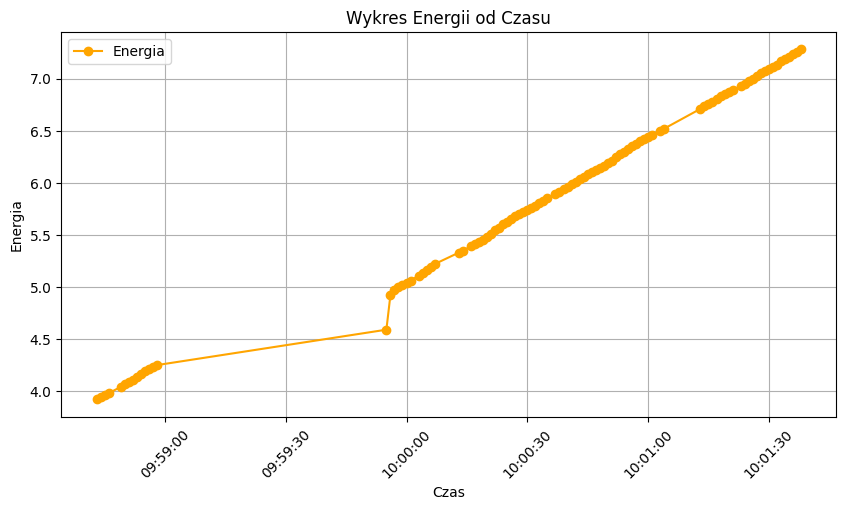

Połączenie z bazą danych zostało zamknięte.


In [2]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

try:
    # Połączenie z bazą MySQL
    conn = mysql.connector.connect(
        host="localhost",
        user="root",
        password="123",
        database="Projekt_db"
    )
    
    cursor = conn.cursor()

    try:
        # Pobieranie danych
        cursor.execute("SELECT Czas, Napiecie_K3, Energia FROM Pomiary ORDER BY Czas DESC LIMIT 1000")
        rows = cursor.fetchall()

        if not rows:
            raise ValueError("Zapytanie nie zwróciło żadnych wyników.")

        # Tworzenie DataFrame
        df = pd.DataFrame(rows, columns=['Czas', 'Napiecie_K3', 'Energia'])

        try:
            df['Data'] = pd.to_datetime(df['Czas'])
        except Exception as e:
            raise ValueError(f"Błąd konwersji kolumny 'Czas' na format datetime: {e}")

        # Rysowanie wykresu Napiecie_K2 od czasu
        plt.figure(figsize=(10, 5))
        plt.plot(df['Czas'], df['Napiecie_K3'], marker='o', linestyle='-', label='Napiecie_K3')
        plt.xlabel("Czas")
        plt.ylabel("Napiecie_K3")
        plt.title("Wykres Napiecia od Czasu")
        plt.xticks(rotation=45)
        plt.grid()
        plt.legend()
        plt.show()

        # Rysowanie wykresu Energii od czasu
        plt.figure(figsize=(10, 5))
        plt.plot(df['Czas'], df['Energia'], marker='o', linestyle='-', color='orange', label='Energia')
        plt.xlabel("Czas")
        plt.ylabel("Energia")
        plt.title("Wykres Energii od Czasu")
        plt.xticks(rotation=45)
        plt.grid()
        plt.legend()
        plt.show()

    except mysql.connector.Error as err:
        print(f"Błąd podczas wykonywania zapytania SQL: {err}")
    except ValueError as ve:
        print(f"Błąd danych: {ve}")
    finally:
        cursor.close()

except mysql.connector.Error as err:
    print(f"Błąd połączenia z bazą danych: {err}")

finally:
    try:
        if conn.is_connected():
            conn.close()
            print("Połączenie z bazą danych zostało zamknięte.")
    except NameError:
        print("Nie udało się nawiązać połączenia z bazą danych.")
